# Hough Line Transform with opencv
ref: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math

(Text(0.5, 1.0, 'Detected Lines (in red) - Probabilistic Line Transform'),
 ([], []),
 ([], []))

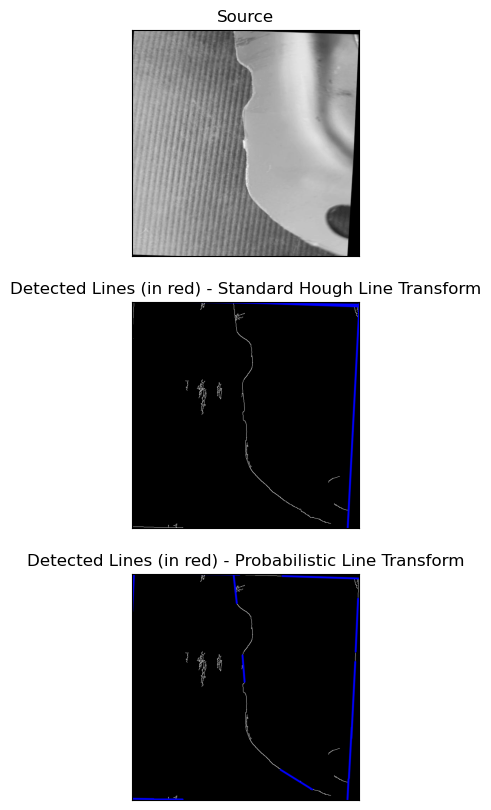

In [25]:

src = cv.imread('test.jpg', cv.IMREAD_GRAYSCALE)
dst = cv.Canny(src, 50, 200, None, 3)
# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
     for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
plt.figure(figsize=(10, 10)) 
plt.subplot(3,1,1),plt.imshow(src,cmap = 'gray')
plt.title('Source'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(cdst,cmap = 'gray')
plt.title('Detected Lines (in red) - Standard Hough Line Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3),plt.imshow(cdstP,cmap = 'gray')
plt.title('Detected Lines (in red) - Probabilistic Line Transform'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Detected Lines (in red) - Probabilistic Line Transform'),
 ([], []),
 ([], []))

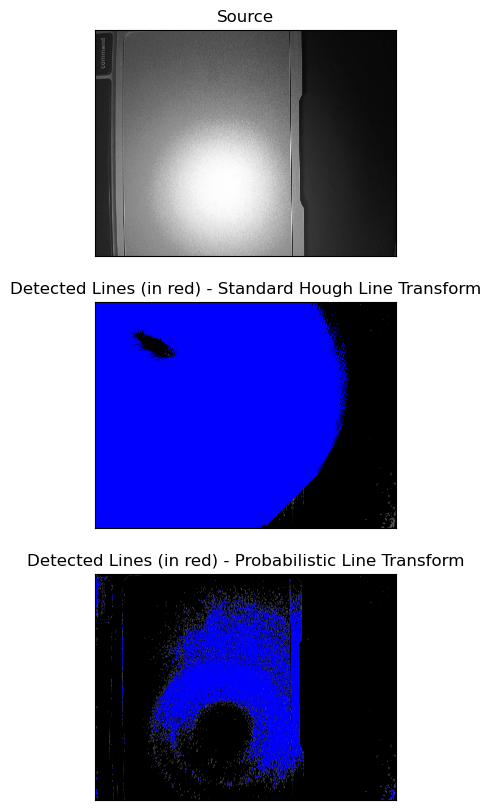

In [23]:


src = cv.imread('laptop_crack.jpg', cv.IMREAD_GRAYSCALE)
dst = cv.Canny(src, 50, 200, None, 3)
# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
     for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
plt.figure(figsize=(10, 10)) 
plt.subplot(3,1,1),plt.imshow(src,cmap = 'gray')
plt.title('Source'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(cdst,cmap = 'gray')
plt.title('Detected Lines (in red) - Standard Hough Line Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3),plt.imshow(cdstP,cmap = 'gray')
plt.title('Detected Lines (in red) - Probabilistic Line Transform'), plt.xticks([]), plt.yticks([])

# Fourier Transform in Numpy

/var/folders/qk/_bqmkr9j4r7d0nbn8pcdlmvm0000gn/T/ipykernel_10485/4071837261.py:23: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


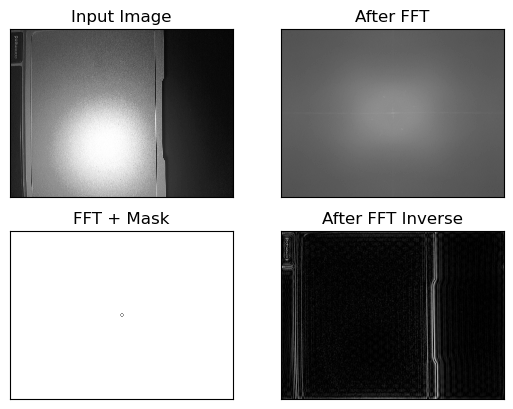

In [90]:
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones

img = cv.imread('laptop_crack.jpg', cv.IMREAD_GRAYSCALE)
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 100
r_in = 20
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1

# apply DFT
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
# apply mask and inverse DFT
fshift = dft_shift * mask
fshift_mask_mag = 2000 * np.log(cv.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# But hough lines  doesn't works well on this fft image

CPU times: user 28.6 s, sys: 685 ms, total: 29.3 s
Wall time: 29.5 s


(Text(0.5, 1.0, 'Detected Lines (in red) - Probabilistic Line Transform'),
 ([], []),
 ([], []))

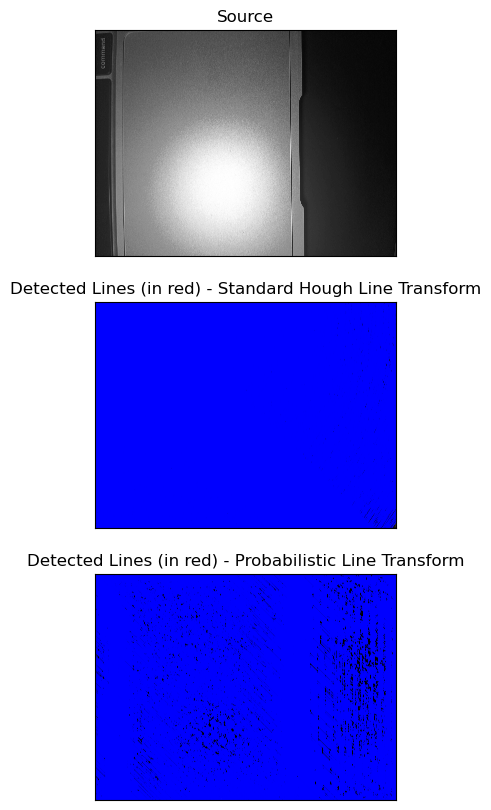

In [78]:
%%time
magnitude_norm = cv.normalize(img_back, None, 0, 255, cv.NORM_MINMAX)
dst = magnitude_norm.astype(np.uint8)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
     for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
plt.figure(figsize=(10, 10)) 
plt.subplot(3,1,1),plt.imshow(img,cmap = 'gray')
plt.title('Source'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2),plt.imshow(cdst,cmap = 'gray')
plt.title('Detected Lines (in red) - Standard Hough Line Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3),plt.imshow(cdstP,cmap = 'gray')
plt.title('Detected Lines (in red) - Probabilistic Line Transform'), plt.xticks([]), plt.yticks([])

# finding reason
ref : https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_line_hough_transform.html

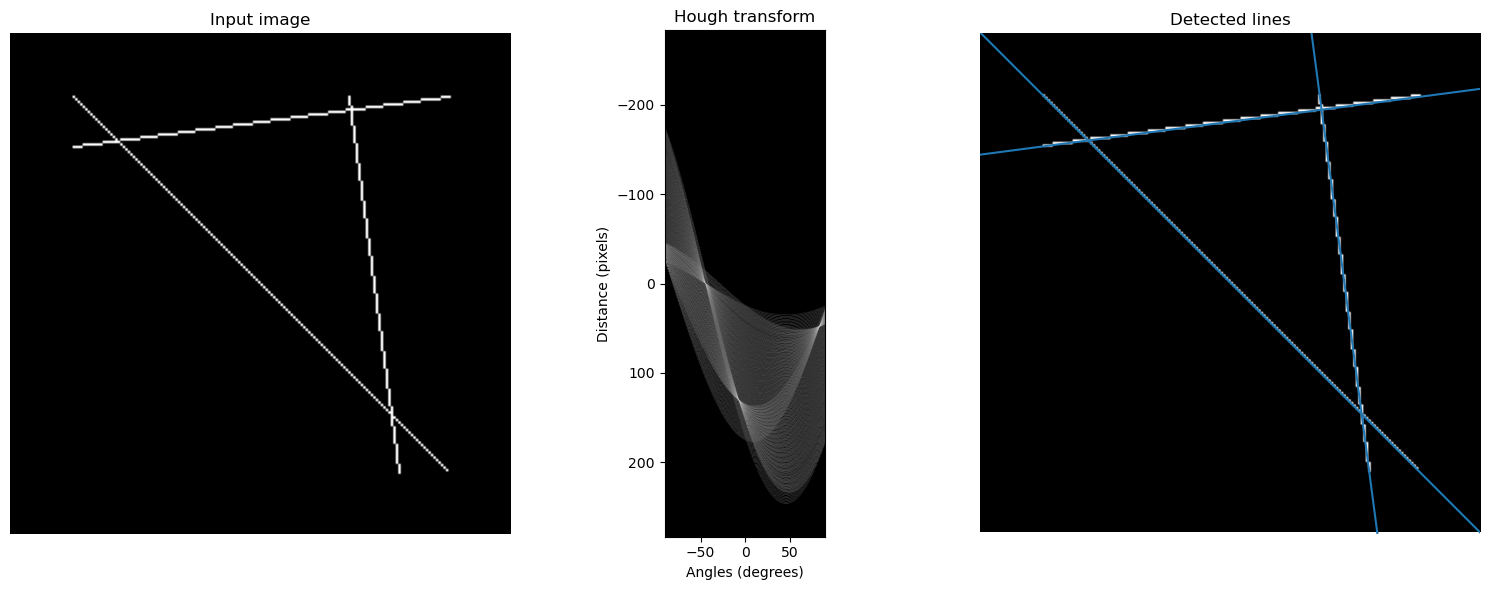

In [83]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[draw_line(45, 25, 25, 175)] = 255
image[draw_line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [
    np.rad2deg(theta[0] - angle_step),
    np.rad2deg(theta[-1] + angle_step),
    d[-1] + d_step,
    d[0] - d_step,
]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

plt.tight_layout()
plt.show()

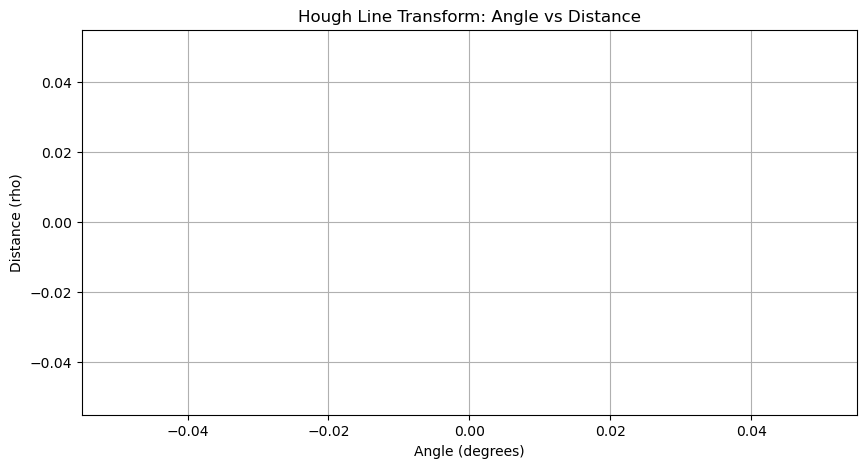

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = dst

# Edge detection
edges = cv2.Canny(img, 50, 150, apertureSize=3)

# Detect lines using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Prepare lists for rho (distance) and theta (angle)
rhos = []
thetas = []

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        rhos.append(rho)
        thetas.append(np.degrees(theta))  # Convert from radians to degrees

# Plot theta (angle in degrees) vs rho (distance)
plt.figure(figsize=(10, 5))
plt.scatter(thetas, rhos, color='blue', s=10)
plt.xlabel('Angle (degrees)')
plt.ylabel('Distance (rho)')
plt.title('Hough Line Transform: Angle vs Distance')
plt.grid(True)
plt.show()
